## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier




# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [67]:
! pip install -q kaggle
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [68]:

! cp /content/drive/'My Drive'/'Capstone'/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [69]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory data analysis

In [70]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [71]:
#observe the different feature type present in the data
df.shape


(284807, 31)

In [72]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [73]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [74]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

Text(0, 0.5, 'Frequency')

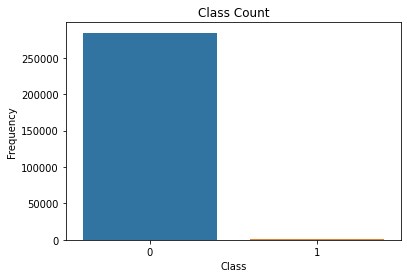

In [75]:
class_count = pd.value_counts(df['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=df)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [76]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [77]:
# Create a scatter plot to observe the distribution of classes with time
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)


Text(0.5, 1.05, 'Time vs Class Distribution')

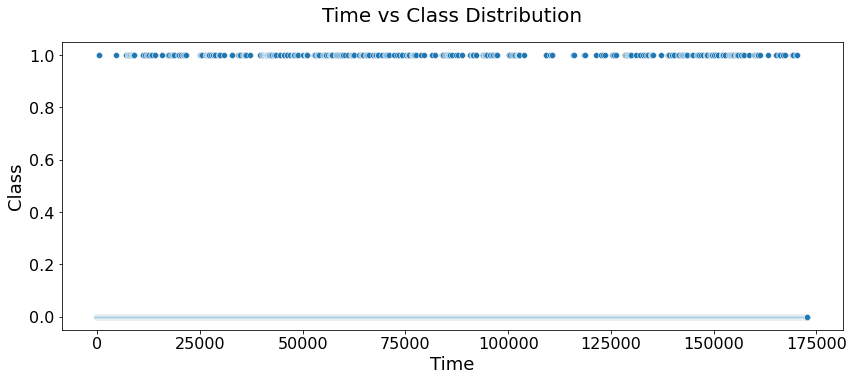

In [78]:
fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

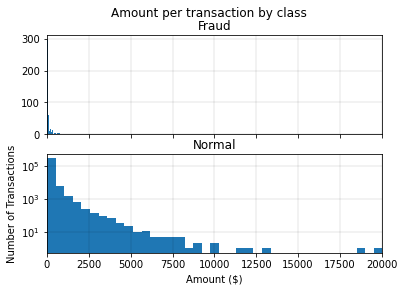

In [79]:

fraud = df[df.Class == 1]
normal = df[df.Class == 0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

We can see that Normal has more number of transactions over Amount when compared to Fraud Transactions.

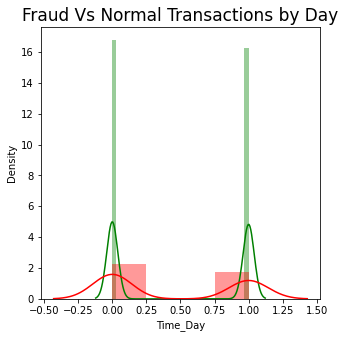

In [80]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

Text(0.5, 1.05, 'Amount vs Class Distribution')

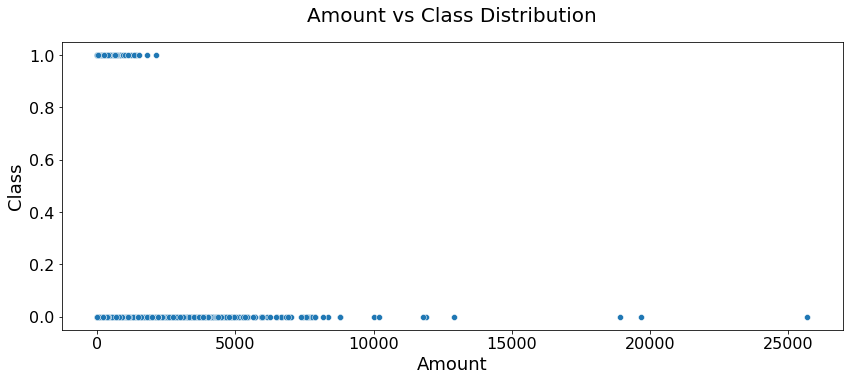

In [81]:
# Create a scatter plot to observe the distribution of classes with Amount
fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)

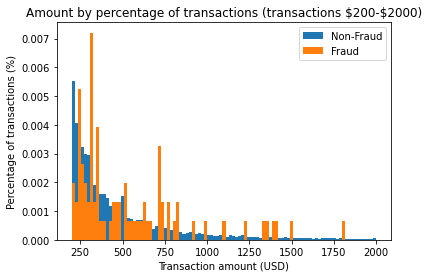

In [82]:
bins = np.linspace(200, 2000, 100)
plt.hist(normal.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()




1.   In the long tail, fraud transaction happened more frequently.
2.   It seems It would be hard to differentiate fraud from normal transactions by transaction amount alone.



In [83]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

In [84]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


### Splitting the data into train & test data

In [85]:
y= df['Class']
X = df.drop(['Class'], axis=1)

In [86]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [87]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

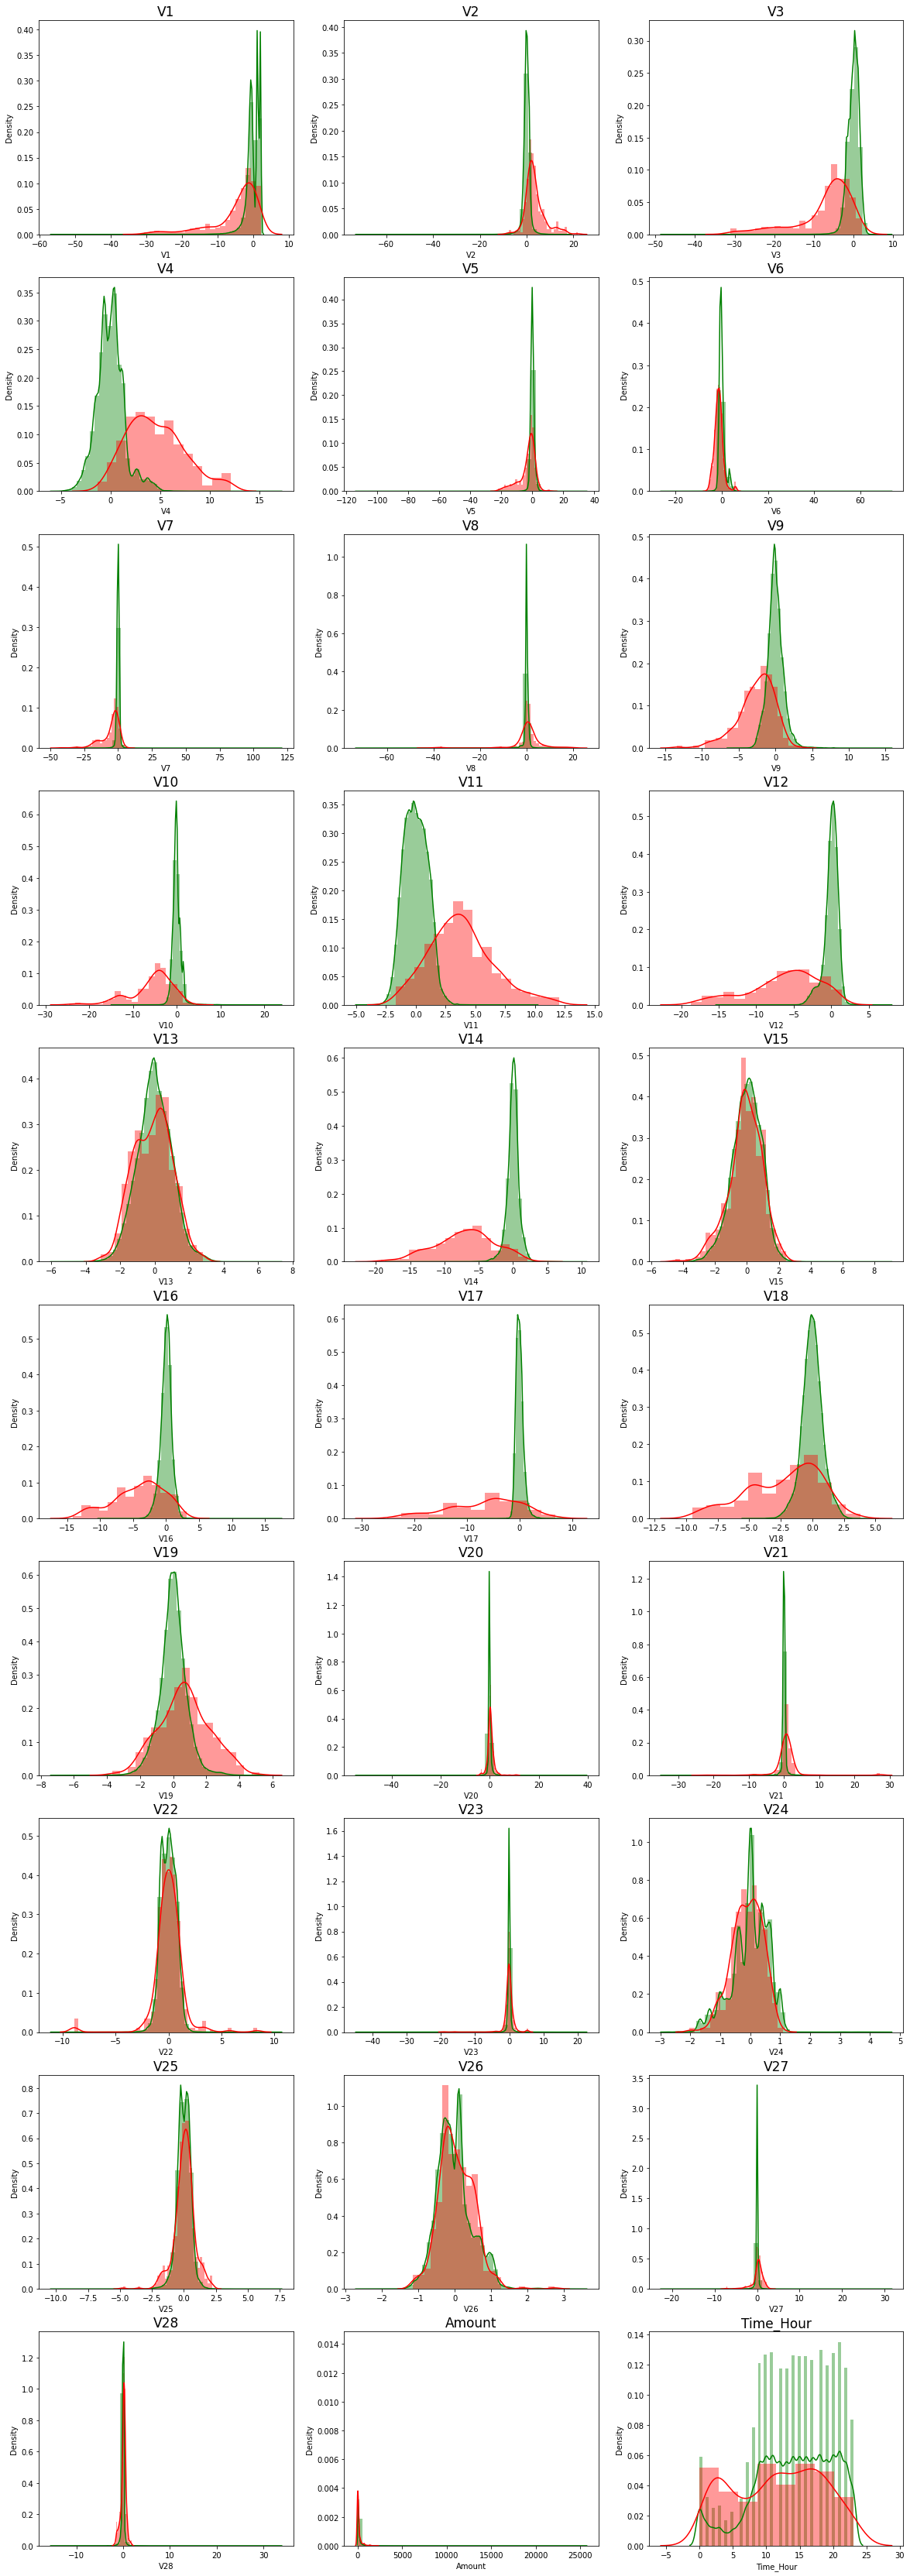

In [88]:
# plot the histogram of a variable from the dataset to see the skewness
column_list = list(X.columns.values)
normal_data = df.Class == 0
fraud_data = df.Class == 1
plt.figure(figsize=(20, 60))
for n, col in enumerate(column_list):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_data], color='green')
  sns.distplot(X[col][fraud_data], color='red')
  plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [89]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
power_t = PowerTransformer()
power_t.fit(X_train)                       ## Fit the PT on training data
X_train_pt = power_t.transform(X_train)    ## Then apply on all data
X_test_pt = power_t.transform(X_test)

In [90]:
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=column_list)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=column_list)

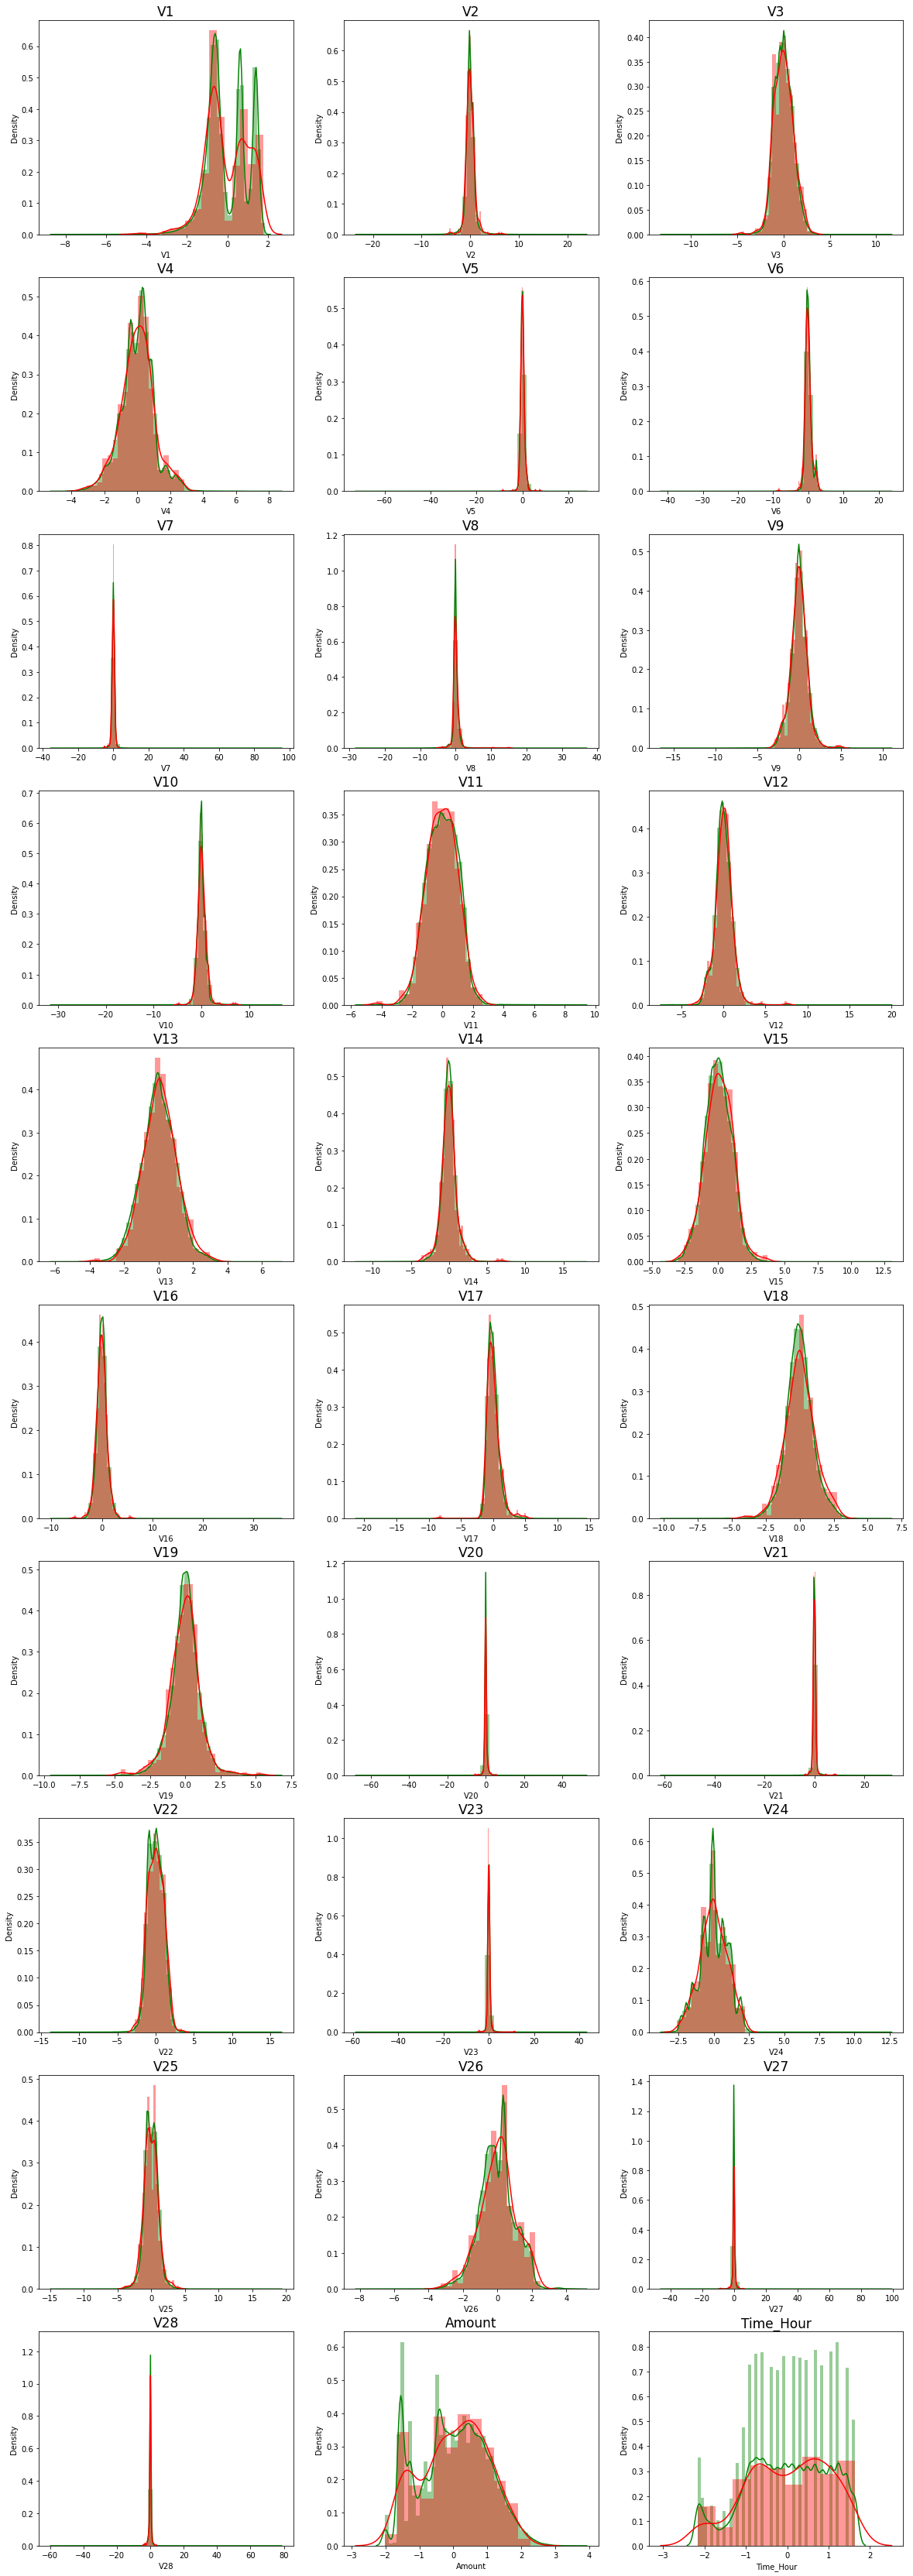

In [91]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(column_list):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_data], color='green')
  sns.distplot(X_train_pt_df[col][fraud_data], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [92]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value',])
def LogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=7, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=101
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

 
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  
 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
 
  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
 
  # Accuaracy of L2 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  
  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
 
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value}, index=[0]),ignore_index= True)
  
  return df_Results

In [93]:
def KNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 7,n_jobs=20)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
 
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value}, index=[0]),ignore_index= True)

  return df_Results

In [94]:
def SVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)

  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,}, index=[0]),ignore_index= True)

  return df_Results

In [95]:
def TreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = [ 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
     
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value}, index=[0]),ignore_index= True)

  return df_Results

In [96]:
def RandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=15, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=101)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,}, index=[0]),ignore_index= True)

  return df_Results

In [97]:
def XGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=101)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,}, index=[0]),ignore_index= True)

  return df_Results

In [98]:
print(" Training Logistic Regression with  L2 Regularisation")

import time
start_time = time.time()
df_Results =LogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print(" Trained Logistic Regression with  L2 Regularisation")
#Run KNN Model
print(" Training  KNN Model")
start_time = time.time()
df_Results = KNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print(" Trained  KNN Model")
#Run Decision Tree Models with 'entropy' criteria
print(" Training Decision Tree Models with 'entropy' criteria")
start_time = time.time()
df_Results = TreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print(" Trained Decision Tree Models with'entropy' criteria")
#Run Random Forest Model
print("Training Random Forest Model")
start_time = time.time()
df_Results = RandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Random Forest Model")
#Run XGBoost Modela
print("Training XGBoost Model")
start_time = time.time()
df_Results = XGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained XGBoost Model")
#Run SVM Model with Sigmoid Kernel
print("Training SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = SVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained SVM Model with Sigmoid Kernel")

 Training Logistic Regression with  L2 Regularisation
Time Taken by Model: --- 40.66426086425781 seconds ---
 Trained Logistic Regression with  L2 Regularisation
 Training  KNN Model
Time Taken by Model: --- 1186.8574590682983 seconds ---
 Trained  KNN Model
 Training Decision Tree Models with 'entropy' criteria
Time Taken by Model: --- 12.685735940933228 seconds ---
 Trained Decision Tree Models with'entropy' criteria
Training Random Forest Model
Time Taken by Model: --- 29.768457889556885 seconds ---
Trained Random Forest Model
Training XGBoost Model
Time Taken by Model: --- 48.7147171497345 seconds ---
Trained XGBoost Model
Training SVM Model with Sigmoid Kernel
Time Taken by Model: --- 78.79649257659912 seconds ---
Trained SVM Model with Sigmoid Kernel


In [99]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966856
1,Power Transformer,KNN,0.999157,0.906030
2,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337
3,Power Transformer,Random Forest,0.999368,0.921304
4,Power Transformer,XGBoost,0.999315,0.975037
5,Power Transformer,SVM,0.998560,0.891322


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

**RepeatedKFold Cross Validation**

In [100]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=7, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5     10     14 ... 284791 284798 284802]
TRAIN: [     2      3      4 ... 284804 284805 284806] TEST: [     0      1     20 ... 284788 284792 284799]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     8     13     18 ... 284782 284801 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      6     22 ... 284784 284793 284794]
TRAIN: [     0      1      2 ... 284802 284805 284806] TEST: [     4     28     36 ... 284795 284803 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    11     12     16 ... 284796 284797 284800]
TRAIN: [     0      1      3 ... 284803 284804 284805] TEST: [     2      7      9 ... 284786 284787 284806]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2     15     24 ... 284784 284785 284793]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     7      9     14 ... 284760 284772 284783]
TRAIN: [     0     

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [101]:
print("Training Logistic Regression with  L2 Regularisation")
start_time = time.time()
df_Results =LogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Logistic Regression with L2 Regularisation")
#Run KNN Model
print("Training KNN Model")
start_time = time.time()
df_Results = KNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained KNN Model")
#Run Decision Tree Models with 'entropy' criteria
print("Training Decision Tree Models with  'entropy' criteria")
start_time = time.time()
df_Results = TreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Decision Tree Models with  'entropy' criteria")
#Run Random Forest Model
print(" Training Random Forest Model")
start_time = time.time()
df_Results = RandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Random Forest Model")
#Run XGBoost Modela
print("Training XGBoost Model")
start_time = time.time()
df_Results = XGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained XGBoost Model")
#Run SVM Model with Sigmoid Kernel
print("Training SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = SVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained SVM Model with Sigmoid Kernel")

Training Logistic Regression with  L2 Regularisation
Time Taken by Model: --- 176.51712250709534 seconds ---
Trained Logistic Regression with L2 Regularisation
Training KNN Model
Time Taken by Model: --- 105.05447316169739 seconds ---
Trained KNN Model
Training Decision Tree Models with  'entropy' criteria
Time Taken by Model: --- 13.261151790618896 seconds ---
Trained Decision Tree Models with  'entropy' criteria
 Training Random Forest Model
Time Taken by Model: --- 32.6010057926178 seconds ---
Trained Random Forest Model
Training XGBoost Model
Time Taken by Model: --- 51.197373390197754 seconds ---
Trained XGBoost Model
Training SVM Model with Sigmoid Kernel
Time Taken by Model: --- 213.5168433189392 seconds ---
Trained SVM Model with Sigmoid Kernel


In [102]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966856
1,Power Transformer,KNN,0.999157,0.906030
2,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337
3,Power Transformer,Random Forest,0.999368,0.921304
4,Power Transformer,XGBoost,0.999315,0.975037
5,Power Transformer,SVM,0.998560,0.891322
6,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999213,0.989138
7,RepeatedKFold Cross Validation,KNN,0.999312,0.876898
8,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999213,0.868212
9,RepeatedKFold Cross Validation,Random Forest,0.999680,0.946947


**StratifiedKFold Cross Validation**

In [103]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=7, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [ 15751  15781  15810 ... 284804 284805 284806] TEST: [    0     1     2 ... 40720 40721 40722]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [15751 15781 15810 ... 81429 81430 81431]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 44556  45203  45732 ... 122097 122098 122099]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 89190  91671  92777 ... 162820 162821 162822]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [145800 146790 147548 ... 203469 203470 203471]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [157585 157868 157871 ... 244142 244143 244144]
TRAIN: [     0      1      2 ... 244142 244143 244144] TEST: [233258 234574 234632 ... 284804 284805 284806]


In [104]:
print("Training Logistic Regression with L2 Regularisation")
start_time = time.time()
df_Results = LogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Logistic Regression with L2 Regularisation")
#Run KNN Model
print("Trainig KNN Model")
start_time = time.time()
df_Results = KNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained KNN Model")
#Run Decision Tree Models with 'entropy' criteria
print("Trainig Decision Tree Models with 'entropy' criteria")
start_time = time.time()
df_Results = TreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Decision Tree Models with 'entropy' criteria")
#Run Random Forest Model
print("Training Random Forest Model")
start_time = time.time()
df_Results = RandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Random Forest Model")
#Run XGBoost Modela
print("Training XGBoost Model")
start_time = time.time()
df_Results = XGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained XGBoost Model")
#Run SVM Model with Sigmoid Kernel
print("Training SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = SVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained SVM Model with Sigmoid Kernel")

Training Logistic Regression with L2 Regularisation
Time Taken by Model: --- 171.40207886695862 seconds ---
Trained Logistic Regression with L2 Regularisation
Trainig KNN Model
Time Taken by Model: --- 94.93330979347229 seconds ---
Trained KNN Model
Trainig Decision Tree Models with 'entropy' criteria
Time Taken by Model: --- 13.87687873840332 seconds ---
Trained Decision Tree Models with 'entropy' criteria
Training Random Forest Model
Time Taken by Model: --- 31.907267332077026 seconds ---
Trained Random Forest Model
Training XGBoost Model
Time Taken by Model: --- 49.31835675239563 seconds ---
Trained XGBoost Model
Training SVM Model with Sigmoid Kernel
Time Taken by Model: --- 180.42909932136536 seconds ---
Trained SVM Model with Sigmoid Kernel


In [105]:
df_Results



,Data_Imbalance_Handiling,Model,Accuracy,roc_value
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966856
1,Power Transformer,KNN,0.999157,0.906030
2,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337
3,Power Transformer,Random Forest,0.999368,0.921304
4,Power Transformer,XGBoost,0.999315,0.975037
5,Power Transformer,SVM,0.998560,0.891322
6,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999213,0.989138
7,RepeatedKFold Cross Validation,KNN,0.999312,0.876898
8,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999213,0.868212
9,RepeatedKFold Cross Validation,Random Forest,0.999680,0.946947


**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [106]:
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=7, shuffle=True, random_state=101)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=101
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)

#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))





Max auc_roc for l2: 0.9856205313172995
Accuarcy of Logistic model with l2 regularisation : 0.9988764439450862
l2 roc_value: 0.9752675148594943


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [107]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

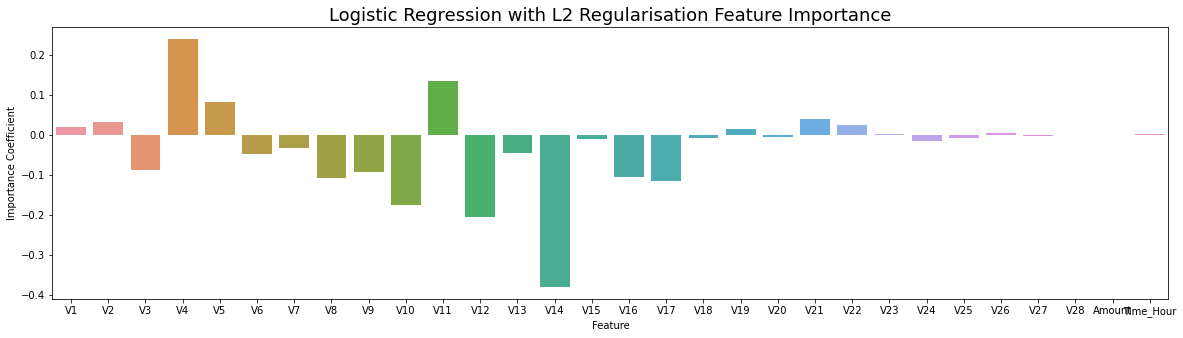

In [108]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()


## Model Building
- Build different models on the balanced dataset and see the result

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

# Oversampling with RandomOverSampler and StratifiedKFold Cross Validation

In [109]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=7, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

In [110]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Trained Logistic Regression with L2 Regularisation")
start_time = time.time()
df_Results =LogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Training Logistic Regression with  L2 Regularisation")
#Run KNN Model
print("Training KNN Model")
start_time = time.time()
df_Results = KNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained KNN Model")
#Run Decision Tree Models with 'entropy' criteria
print("Training Decision Tree Models with  'entropy' criteria")
start_time = time.time()
df_Results = TreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Decision Tree Models with  'entropy' criteria")
#Run Random Forest Model
print("Training Random Forest Model")
start_time = time.time()
df_Results =RandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Random Forest Model")
#Run XGBoost Model
print("Training XGBoost Model")
start_time = time.time()
df_Results = XGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained XGBoost Model")

Trained Logistic Regression with L2 Regularisation
Time Taken by Model: --- 249.54825448989868 seconds ---
Training Logistic Regression with  L2 Regularisation
Training KNN Model
Time Taken by Model: --- 82.29887008666992 seconds ---
Trained KNN Model
Training Decision Tree Models with  'entropy' criteria
Time Taken by Model: --- 11.552454471588135 seconds ---
Trained Decision Tree Models with  'entropy' criteria
Training Random Forest Model
Time Taken by Model: --- 23.880139112472534 seconds ---
Trained Random Forest Model
Training XGBoost Model
Time Taken by Model: --- 66.59147500991821 seconds ---
Trained XGBoost Model


In [111]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966856
1,Power Transformer,KNN,0.999157,0.906030
2,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337
3,Power Transformer,Random Forest,0.999368,0.921304
4,Power Transformer,XGBoost,0.999315,0.975037
5,Power Transformer,SVM,0.998560,0.891322
6,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999213,0.989138
7,RepeatedKFold Cross Validation,KNN,0.999312,0.876898
8,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999213,0.868212
9,RepeatedKFold Cross Validation,Random Forest,0.999680,0.946947


**Random Oversampling seems to have +ve change in prediction for XGBoost**

# Oversampling with SMOTE Oversamplng

# Print the class distribution after applying SMOTE

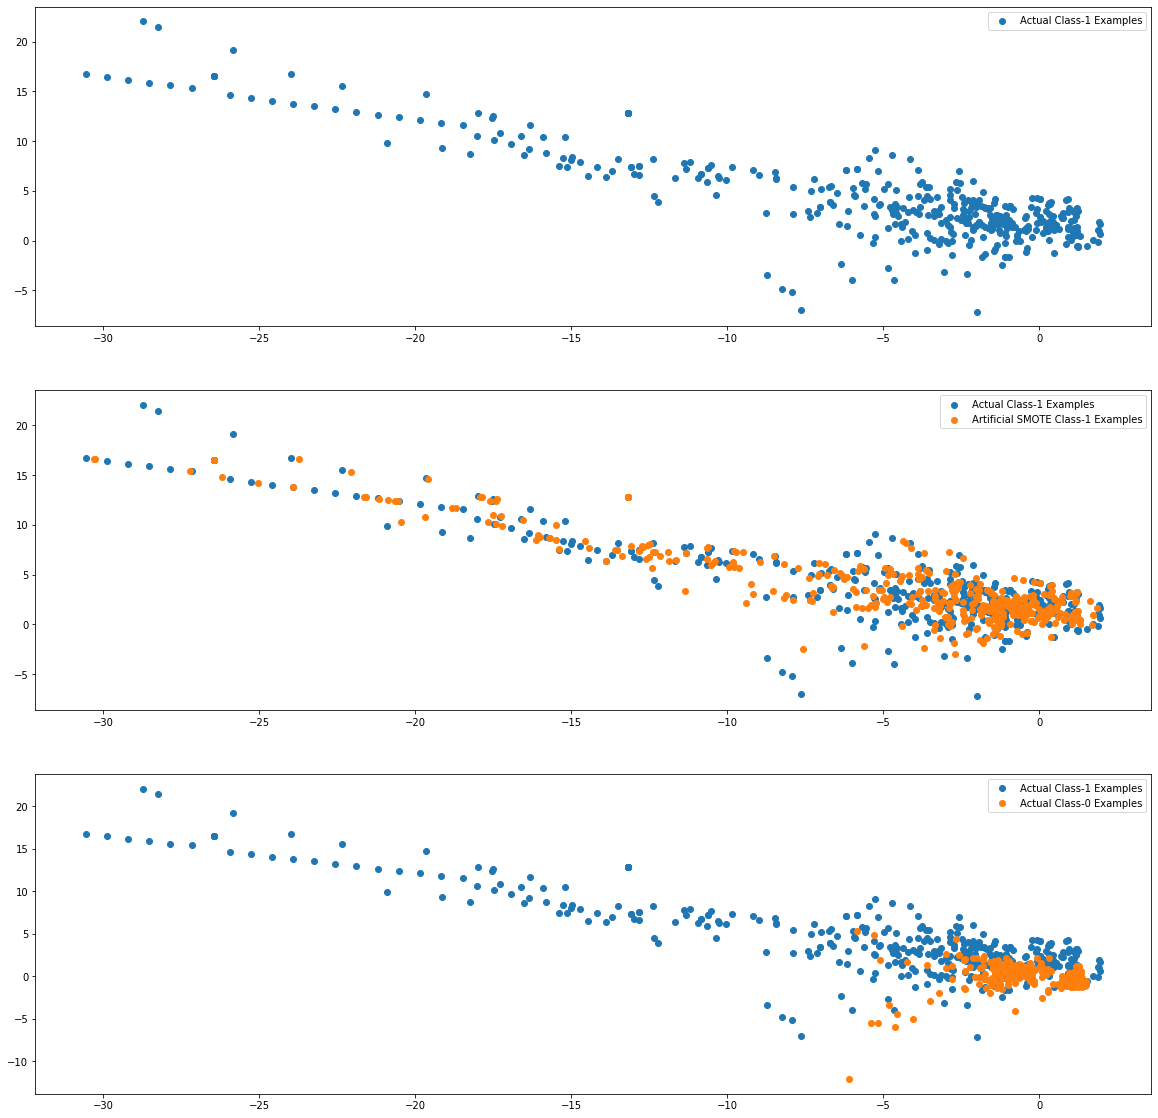

In [112]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train) 

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [113]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=7, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [114]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Training Logistic Regression with  L2 Regularisation")
start_time = time.time()
df_Results = LogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Logistic Regression with  L2 Regularisation")
#Run KNN Model
print("Training KNN Model")
start_time = time.time()
df_Results =KNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained KNN Model")
#Run Decision Tree Models with 'entropy' criteria
print("Training Decision Tree Models with 'entropy' criteria")
start_time = time.time()
df_Results = TreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Decision Tree Models with 'entropy' criteria")
#Run Random Forest Model
print("Training Random Forest Model")
start_time = time.time()
df_Results = RandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Random Forest Model")
#Run XGBoost Model
print("Training XGBoost Model")
start_time = time.time()
df_Results =XGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained XGBoost Model")

Training Logistic Regression with  L2 Regularisation
Time Taken by Model: --- 359.3926422595978 seconds ---
Trained Logistic Regression with  L2 Regularisation
Training KNN Model
Time Taken by Model: --- 89.48268485069275 seconds ---
Trained KNN Model
Training Decision Tree Models with 'entropy' criteria
Time Taken by Model: --- 29.177372455596924 seconds ---
Trained Decision Tree Models with 'entropy' criteria
Training Random Forest Model
Time Taken by Model: --- 54.9222309589386 seconds ---
Trained Random Forest Model
Training XGBoost Model
Time Taken by Model: --- 113.57885503768921 seconds ---
Trained XGBoost Model


In [115]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966856
1,Power Transformer,KNN,0.999157,0.906030
2,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337
3,Power Transformer,Random Forest,0.999368,0.921304
4,Power Transformer,XGBoost,0.999315,0.975037
5,Power Transformer,SVM,0.998560,0.891322
6,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999213,0.989138
7,RepeatedKFold Cross Validation,KNN,0.999312,0.876898
8,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999213,0.868212
9,RepeatedKFold Cross Validation,Random Forest,0.999680,0.946947


**Results for SMOTE Oversampling:**
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

# Oversampling with ADASYN Oversampling

# Print the class distribution after applying ADASYN

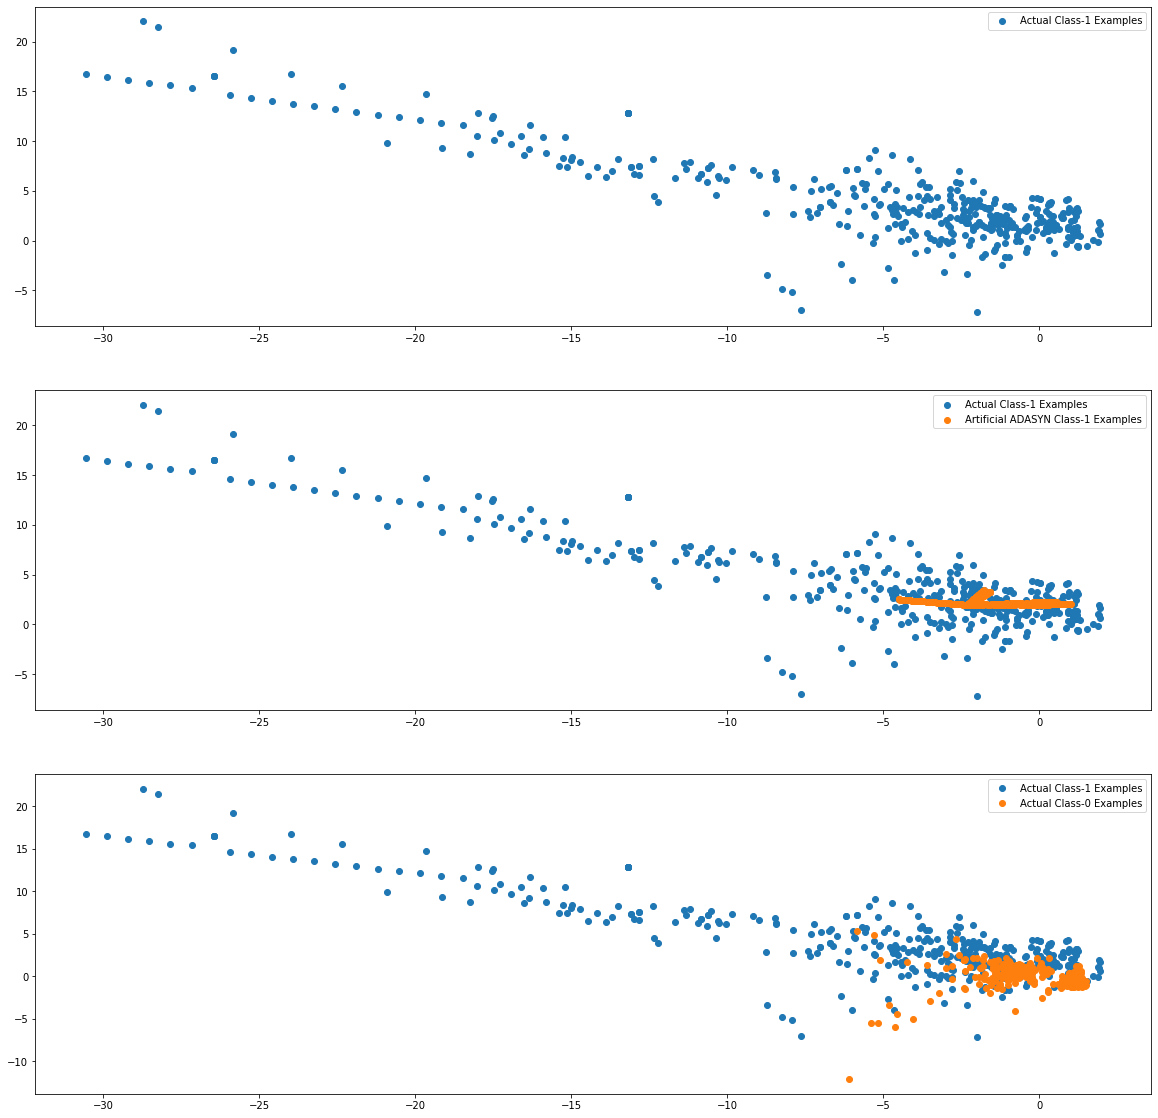

In [116]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_sample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()



In [117]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=7, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

In [118]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Training Logistic Regression with  L2 Regularisation")
start_time = time.time()
df_Results = LogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Logistic Regression with  L2 Regularisation")
#Run KNN Model
print("Training KNN Model")
start_time = time.time()
df_Results =KNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained KNN Model")
#Run Decision Tree Models with  'entropy' criteria
print("Training Decision Tree Models with  'entropy' criteria")
start_time = time.time()
df_Results = TreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Decision Tree Models with  'entropy' criteria")
#Run Random Forest Model
print("Training Random Forest Model")
start_time = time.time()
df_Results = RandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained Random Forest Model")
#Run XGBoost Model
print("Training XGBoost Model")
start_time = time.time()
df_Results =XGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("Trained XGBoost Model")

Training Logistic Regression with  L2 Regularisation
Time Taken by Model: --- 363.7876365184784 seconds ---
Trained Logistic Regression with  L2 Regularisation
Training KNN Model
Time Taken by Model: --- 86.84398031234741 seconds ---
Trained KNN Model
Training Decision Tree Models with  'entropy' criteria
Time Taken by Model: --- 35.98158550262451 seconds ---
Trained Decision Tree Models with  'entropy' criteria
Training Random Forest Model
Time Taken by Model: --- 55.818960666656494 seconds ---
Trained Random Forest Model
Training XGBoost Model
Time Taken by Model: --- 111.04038953781128 seconds ---
Trained XGBoost Model


In [119]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966856
1,Power Transformer,KNN,0.999157,0.906030
2,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337
3,Power Transformer,Random Forest,0.999368,0.921304
4,Power Transformer,XGBoost,0.999315,0.975037
5,Power Transformer,SVM,0.998560,0.891322
6,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999213,0.989138
7,RepeatedKFold Cross Validation,KNN,0.999312,0.876898
8,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999213,0.868212
9,RepeatedKFold Cross Validation,Random Forest,0.999680,0.946947


**Results for ADASYN Oversampling**: Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

**Random Oversampling with StratifiedKFold CV	 Has given best results from Oversampling techniques do choosing that as the final model **

In [123]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier( random_state=101)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("fpr value: {0}" .format(fpr))
print("tpr value: {0}" .format(tpr))
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9963378066165266
XGboost roc_value: 0.9816850853991389
fpr value: [0.         0.         0.         ... 0.99982765 0.99997538 1.        ]
tpr value: [0.         0.01428571 0.04285714 ... 1.         1.         1.        ]
XGBoost threshold: 0.20466504991054535


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 12
3rd Top var = 17


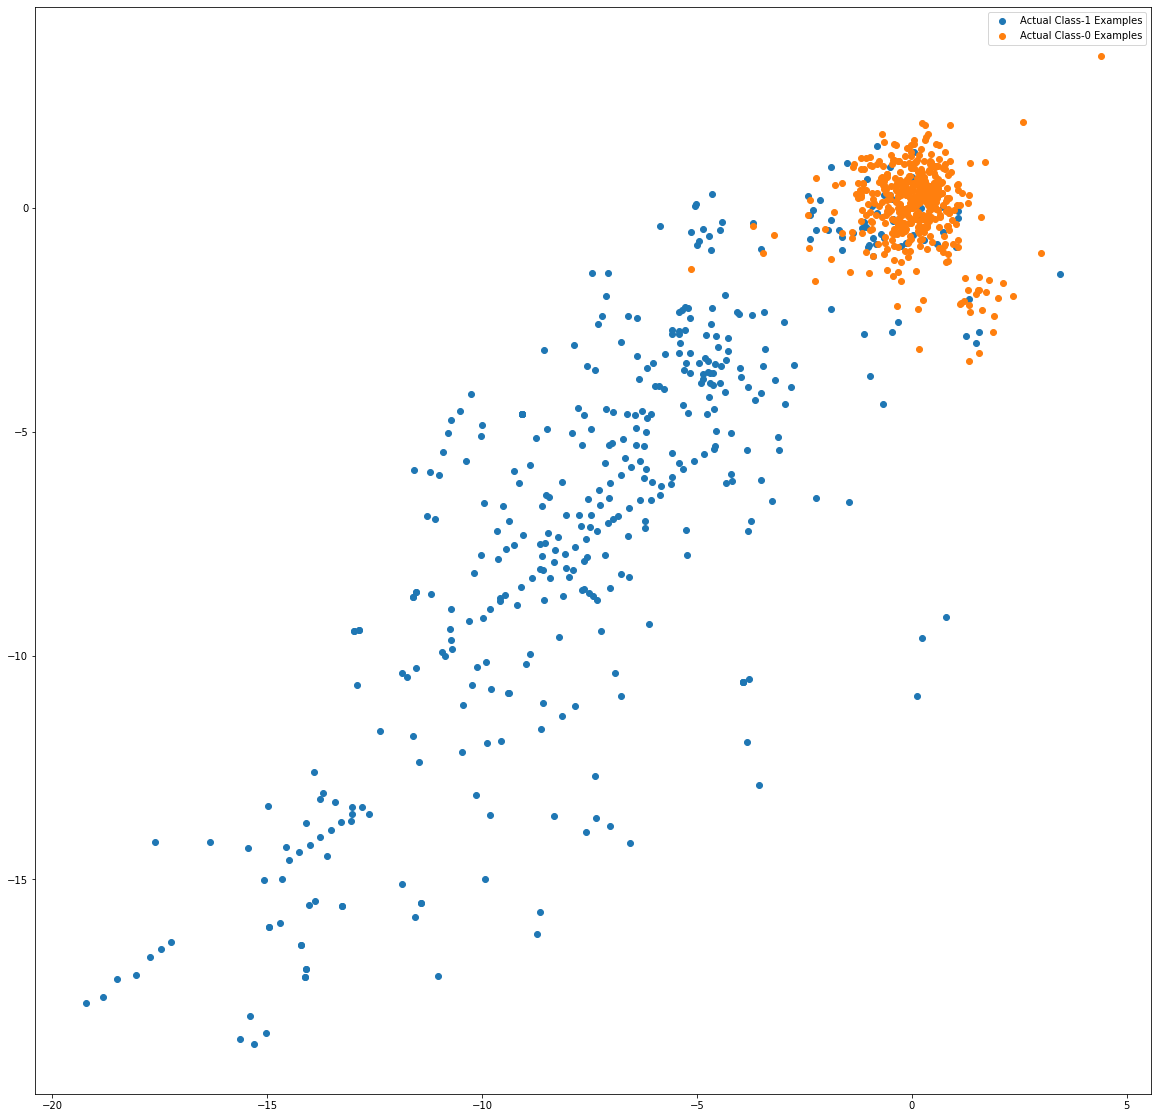

In [125]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [124]:
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
print("fpr value: {0}" .format(fpr))
print("tpr value: {0}" .format(tpr))

XGboost roc_value: 0.9816850853991389
XGBoost threshold: 0.20466504991054535
fpr value: [0.         0.         0.         ... 0.99982765 0.99997538 1.        ]
tpr value: [0.         0.01428571 0.04285714 ... 1.         1.         1.        ]


#Conclusion

**Model Selection:**

Overall conclusion after running models on Oversampled data:
Looking at above results it seems **XGBOOST model with Random Oversampling with StratifiedKFold CV** has provided best results.

We also noticed by looking at the results **Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation** has been provided best results without any oversampling.